# ENSEMBLE METHODS PART 2

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__3.PREPROCESSING__

__4.ADABOOST__
             
__5.GRADIENT BOOSTING__

__6.RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll make use of the ensemble methods AdaBoost and Gradient Boosting.

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,196.0,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,182.4,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,170.4,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,187.4,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

In [7]:
X_train.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [8]:
X_test.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 4. ADABOOST

In [9]:
# Defining Grid for GridSearchCV

grid = {'base_estimator': [DecisionTreeRegressor(), LinearRegression(), KNeighborsRegressor()], 
        'n_estimators': [5,10,15,20,25],
        'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5],
        'loss' : ['linear', 'square', 'exponential']}

In [10]:
# Instantiating GridSearchCV 

AdaBoost_search = GridSearchCV(AdaBoostRegressor(random_state = 126), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1 ,verbose = 1)

In [11]:
# Searching for the best parameters 

CV_AdaBoost_results = AdaBoost_search.fit(X_train, Y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


In [12]:
# Displaying the best parameters 

AdaBoost_Best_Parameters = pd.DataFrame(CV_AdaBoost_results.best_params_,
                                        index = ['Best AdaBoost Regression Parameters'])

AdaBoost_Best_Parameters = AdaBoost_Best_Parameters.transpose()
AdaBoost_Best_Parameters

,Best AdaBoost Regression Parameters
base_estimator,DecisionTreeRegressor()
learning_rate,0.5
loss,linear
n_estimators,25


In [13]:
# Storing the values of the best parameters

best_estimator = CV_AdaBoost_results.best_params_['base_estimator']
best_n_estimators = CV_AdaBoost_results.best_params_['n_estimators']
best_learning_rate = CV_AdaBoost_results.best_params_['learning_rate']
best_loss = CV_AdaBoost_results.best_params_['loss']

In [14]:
# Instantiating the best model

AdaBoostModel = AdaBoostRegressor(random_state = 126,
                                 base_estimator = best_estimator,
                                 n_estimators = best_n_estimators, 
                                  learning_rate = best_learning_rate, 
                                  loss = best_loss).fit(X_train, Y_train)


In [15]:
# Getting the R^2

AB_R2 = np.round(AdaBoostModel.score(X_train, Y_train),3)

In [16]:
# Getting predictions and training MSE 

AdaBoostPredictions = AdaBoostModel.predict(X_train)
AdaBoost_Training_MSE = np.round(mean_squared_error(Y_train, AdaBoostPredictions),2)

In [17]:
# Getting kfold MSE 

adaboost_cv_MSE = round(np.mean(cross_val_score(AdaBoostModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)


In [18]:
# Getting predictions and test MSE 

ADABOOST_predictions = AdaBoostModel.predict(X_test)
ADABOOST_Test_MSE = round(mean_squared_error(Y_test, ADABOOST_predictions), 2)

In [19]:
# Dictionary that holds the performance metrics 

dict1 = {'AdaBoost': (np.round(AB_R2,3), AdaBoost_Training_MSE,
                                            adaboost_cv_MSE, ADABOOST_Test_MSE )}

In [20]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [21]:
# Displaying the metrics

Evaluation_df

,AdaBoost
R^2,1.00
Training_MSE,0.10
Training_MSE (KFold),363.10
Test_MSE,295.11


## 5.GRADIENT BOOSTING

In [22]:
# Defining Grid for GridSearchCV

grid = {'min_samples_split' : [3,4,5],
       'min_samples_leaf' : [4,5,6],
       'max_depth' : [3,6,9,None],
       'max_features' : ['sqrt', None],
       'learning_rate': [0.001, 0.01],
       'n_estimators': [5, 10, 15]}

In [23]:
# Instantiating GridSearchCV 

GraBoost_search = GridSearchCV(GradientBoostingRegressor(random_state = 126), 
                            grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1 ,verbose = 1)

In [24]:
# Searching for the best parameters 

CV_GraBoost_results = GraBoost_search.fit(X_train, Y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [25]:
# Displaying the best parameters 

GraBoost_Best_Parameters = pd.DataFrame(CV_GraBoost_results.best_params_,
                                        index = ['Best Gradient Boosting Regression Parameters'])

GraBoost_Best_Parameters = GraBoost_Best_Parameters.transpose()
GraBoost_Best_Parameters

,Best Gradient Boosting Regression Parameters
learning_rate,0.01
max_depth,9
max_features,None
min_samples_leaf,4
min_samples_split,3
n_estimators,15


In [26]:
# Storing the values of the best parameters

best_min_samples_split = CV_GraBoost_results.best_params_['min_samples_split']
best_min_samples_leaf = CV_GraBoost_results.best_params_['min_samples_leaf']
best_max_depth = CV_GraBoost_results.best_params_['max_depth']
best_max_features = CV_GraBoost_results.best_params_['max_features']
best_learning_rate = CV_GraBoost_results.best_params_['learning_rate']
best_n_estimators = CV_GraBoost_results.best_params_['n_estimators']

In [27]:
# Instantiating the best model

GraBoostModel = GradientBoostingRegressor(random_state = 126, 
                                  min_samples_split = best_min_samples_split,
                                  min_samples_leaf = best_min_samples_leaf, 
                                  max_depth = best_max_depth,
                                  max_features = best_max_features,
                                  learning_rate = best_learning_rate,
                                  n_estimators = best_n_estimators).fit(X_train,Y_train)

In [28]:
# Getting the R^2

GB_R2 = np.round(GraBoostModel.score(X_train,Y_train),3)

In [29]:
# Getting predictions and training MSE 

GraBoostPredictions = GraBoostModel.predict(X_train)
GraBoost_Training_MSE = np.round(mean_squared_error(Y_train, GraBoostPredictions),2)

In [30]:
# Getting kfold MSE 

graboost_cv_MSE = round(np.mean(cross_val_score(GraBoostModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [31]:
# Getting predictions and test MSE 

GRABOOST_predictions = GraBoostModel.predict(X_test)
GRABOOST_Test_MSE = round(mean_squared_error(Y_test, GRABOOST_predictions), 2)

In [32]:
# Dictionary that holds the performance metrics 

dict2 = {'Gradient Boosting': (np.round(GB_R2,3), GraBoost_Training_MSE,
                                            graboost_cv_MSE, GRABOOST_Test_MSE )}

In [33]:
# Creating a dataframe to easily present the results 

Evaluation_df1 = pd.DataFrame(dict2, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [34]:
# Displaying the metrics

Evaluation_df1

,Gradient Boosting
R^2,0.196
Training_MSE,580.950
Training_MSE (KFold),635.700
Test_MSE,534.670


## 6. RESULTS

__Aggragated Results__

In [35]:
Ensemble_Models_Part2_Results = pd.concat([Evaluation_df, Evaluation_df1], axis = 1)
Ensemble_Models_Part2_Results

,AdaBoost,Gradient Boosting
R^2,1.00,0.196
Training_MSE,0.10,580.950
Training_MSE (KFold),363.10,635.700
Test_MSE,295.11,534.670


__Residuals's Plots__

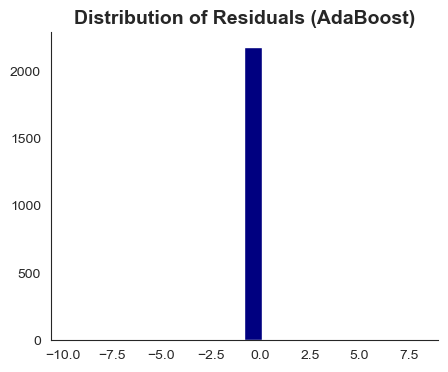

In [36]:
residuals_adaboost = AdaBoostPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_adaboost, bins = 20, color =  "navy")
    
plt.title(label = "Distribution of Residuals (AdaBoost)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

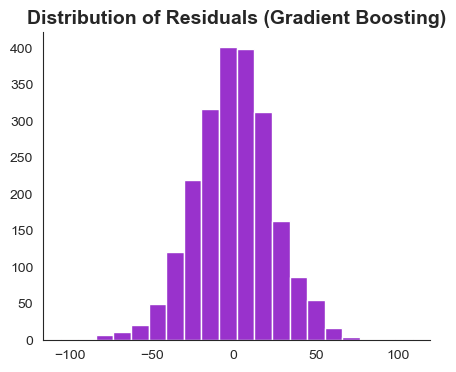

In [37]:
residuals_graboost = GraBoostPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_graboost, bins = 20, color = "darkorchid")
    
plt.title(label = "Distribution of Residuals (Gradient Boosting)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

AdaBoost tends to overfit the data, often resulting in a training error that approaches zero. Despite this tendency, AdaBoost demonstrates strong performance as indicated by acceptable cross-validated and test errors. On the other hand, Gradient Boosting exhibits less favorable performance compared to AdaBoost, struggling to achieve satisfactory results.

__Saving the Results__

In [38]:
Ensemble_Models_Part2_Results.to_csv(r'Ensemble_Models_Part2_Results.csv', index=True, 
                                              index_label= 'Metrics')